https://mbd.baidu.com/newspage/data/landingsuper?context=%7B%22nid%22%3A%22news_9467865820366796977%22%7D&n_type=0&p_from=1

Pandas 有三种通过调用 fillna（）处理丢失数据的模式：

* method='ffill'：ffill 或 forward fill 向前查找非空值，直到遇到另一个非空值
* method='bfill'：bfill 或 backward fill 将第一个观察到的非空值向后传播，直到遇到另一个非空值
* 显式值：也可以设置一个精确的值来替换所有的缺失值。例如，这个替换值可以是 -999，以表示缺少该值。

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
demo = pd.Series(range(6))
demo.loc[2:4] = np.nan
demo

0    0.0
1    1.0
2    NaN
3    NaN
4    NaN
5    5.0
dtype: float64

In [4]:
# Forward-Fill
demo.fillna(method='ffill')

0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
5    5.0
dtype: float64

In [5]:
# Backward-Fill
demo.fillna(method='bfill')

0    0.0
1    1.0
2    5.0
3    5.0
4    5.0
5    5.0
dtype: float64

In [6]:
demo.fillna(-999)

0      0.0
1      1.0
2   -999.0
3   -999.0
4   -999.0
5      5.0
dtype: float64

In [7]:
# sample 1000 boys and 1000 girls
boys = np.random.normal(70, 5, 1000)
girls = np.random.normal(50, 3, 1000)
# unfortunately, the intern running the survey on the girls got distracted and lost 100 samples
for i in range(100):
    girls[np.random.randint(0, 1000)] = np.nan
# build DataFrame
boys = pd.DataFrame(boys, columns=['weight'])
boys['gender'] = 'boy'
girls = pd.DataFrame(girls, columns=['weight'])
girls['gender'] = 'girl'
df = pd.concat([girls, boys], axis=0)
df['weight'] = df['weight'].astype(float)

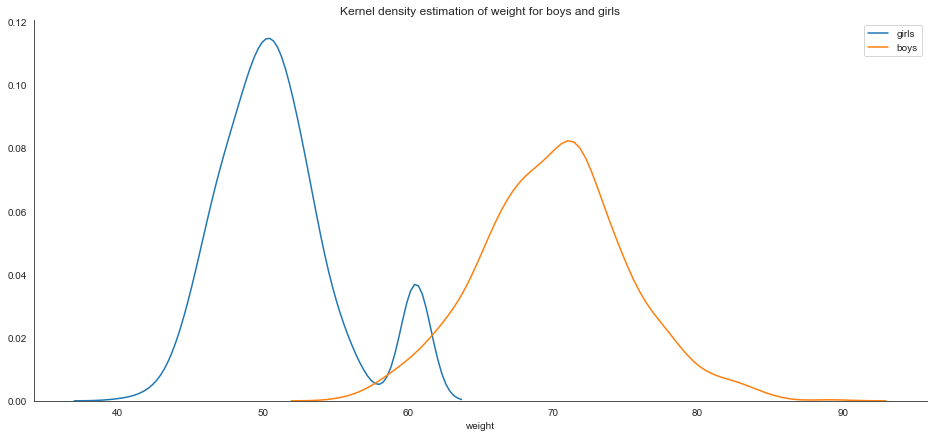

In [12]:
# PLOT CODE:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(16, 7))
mean = df['weight'].mean()
sns.distplot(
    df[df['gender'] == 'girl']['weight'].fillna(mean),
    kde=True,
    hist=False,
    ax=ax,
    label='girls'
)
sns.distplot(
    df[df['gender'] == 'boy']['weight'],
    kde=True,
    hist=False,
    ax=ax,
    label='boys'
)
plt.title('Kernel density estimation of weight for boys and girls')
sns.despine()

In [13]:
# 用组的平均值填充缺失值
df['filled_weight'] = df.groupby('gender')['weight'].transform(
    lambda grp: grp.fillna(np.mean(grp))
)

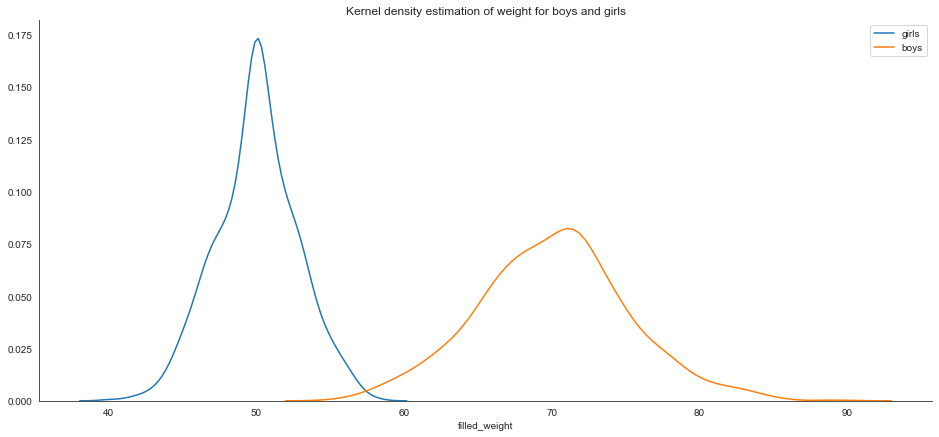

In [15]:
# PLOT CODE:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(16, 7))
sns.distplot(
    df[df['gender'] == 'girl']['filled_weight'],
    kde=True,
    hist=False,
    ax=ax,
    label='girls'
)
sns.distplot(
    df[df['gender'] == 'boy']['filled_weight'],
    kde=True,
    hist=False,
    ax=ax,
    label='boys'
)
plt.title('Kernel density estimation of weight for boys and girls')
sns.despine()

In [16]:
# 多个子组
# paramter for the weight distribution (mean, std)
param_map = {
    'boy': {
        '<10': (40, 4),
        '<20': (60, 4),
        '20+': (70, 5),
    },
    'girl': {
        '<10': (30, 2),
        '<20': (40, 3),
        '20+': (50, 3),
    }
}
# generate 10k records
df = pd.DataFrame({
    'gender': np.random.choice(['girl', 'boy'], 10000),
    'age_cohort': np.random.choice(['<10', '<20', '20+'], 10000)
})
# set random weight based on parameters
df['weight'] = df.apply(
    lambda x: np.random.normal(
        loc=param_map[x['gender']][x['age_cohort']][0],
        scale=param_map[x['gender']][x['age_cohort']][1]
    ), axis=1
)
# set 500 values missing
for i in range(500):
    df.loc[np.random.randint(0, len(df)), 'weight'] = np.nan

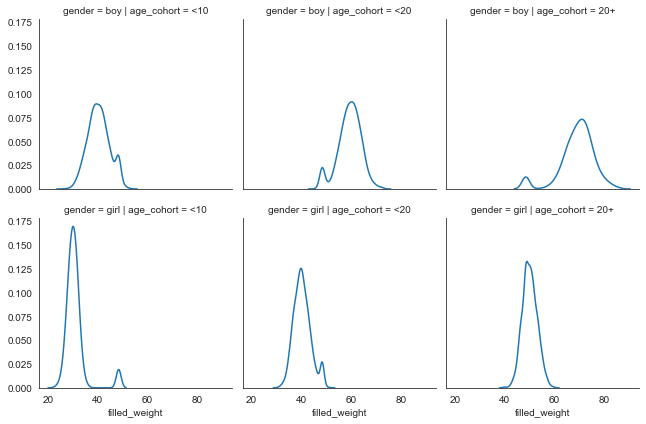

In [23]:
# PLOT CODE
df['filled_weight'] = df['weight'].fillna(
    df['weight'].mean()
)
g = sns.FacetGrid(
    df,
    col='age_cohort',
    row='gender',
    col_order=['<10','<20','20+']
)
g.map(sns.kdeplot,'filled_weight')

In [24]:
df.head()

,gender,age_cohort,weight,filled_weight
0,boy,20+,67.776125,67.776125
1,girl,<10,NaN,48.408739
2,girl,<10,28.628224,28.628224
3,girl,20+,51.359257,51.359257
4,boy,20+,74.251339,74.251339


In [25]:
# 现在，如果我们只用性别的平均值来代替缺失的值，就远远不够，因为男孩和女孩不仅体重不同，而且不同年龄组的体重也大不相同。
# 幸运的是，可以像前面一样使用转换，我们将对两列进行分组
df['filled_weight'] = df.groupby(['gender','age_cohort'])['weight'].transform(
    lambda grp: grp.fillna(np.mean(grp))
)

In [26]:
df.head()

,gender,age_cohort,weight,filled_weight
0,boy,20+,67.776125,67.776125
1,girl,<10,NaN,29.957626
2,girl,<10,28.628224,28.628224
3,girl,20+,51.359257,51.359257
4,boy,20+,74.251339,74.251339


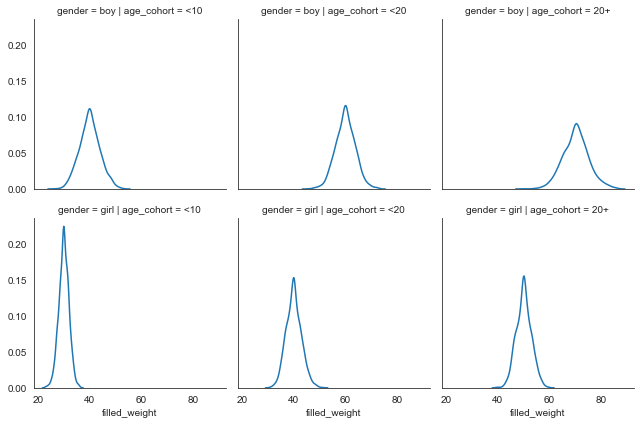

In [27]:
# PLOT CODE
g = sns.FacetGrid(
    df,
    col='age_cohort',
    row='gender',
    col_order=['<10','<20','20+']
)
g.map(sns.kdeplot,'filled_weight')

In [28]:
# 当顺序相关时，处理丢失的数据
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/FBosler/you-datascientist/master/happiness_with_continent.csv')

In [29]:
df.sample(5)

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",Continent
484,Ethiopia,2018,4.379262,7.524517,0.740155,58.500000,0.740343,0.043274,0.799466,0.659521,...,0.340333,0.440553,NaN,NaN,NaN,NaN,NaN,0.225263,NaN,Africa
739,Japan,2007,6.238198,10.510457,0.938148,73.440002,0.796054,-0.101111,0.809233,0.731494,...,0.321000,NaN,NaN,0.407623,0.375865,NaN,0.396476,0.365876,0.359394,Asia
1693,Zimbabwe,2008,3.174264,7.102516,0.843475,44.139999,0.343556,-0.068002,0.963846,0.630983,...,0.432000,NaN,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942,Africa
219,Burkina Faso,2011,4.785367,7.294864,0.709528,50.240002,0.724568,-0.095374,0.706798,0.578625,...,0.394667,0.454175,NaN,NaN,NaN,NaN,NaN,0.143534,NaN,Africa
1039,Mozambique,2017,4.279863,7.035359,0.678464,53.200001,0.822671,-0.024964,0.682109,0.648381,...,0.488667,0.608845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa


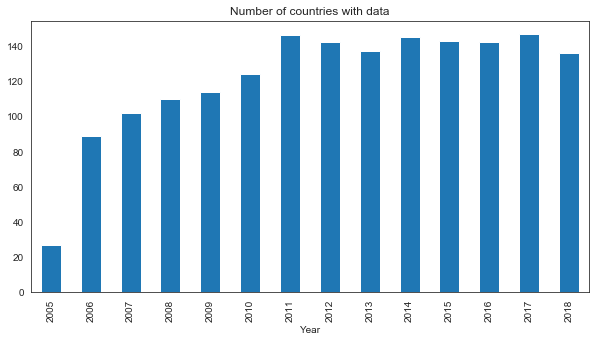

In [30]:
# PLOT CODE:
df.groupby(['Year']).size().plot(
    kind='bar',
    title='Number of countries with data',
    figsize=(10,5)
)

In [31]:
# Define helper function
def add_missing_years(grp):
    _ = grp.set_index('Year')
    _ = _.reindex(list(range(2005,2019)))
    del _['Country name']
    return _
# Group by country name and extend
df = df.groupby('Country name').apply(add_missing_years)
df = df.reset_index()

In [32]:
# Define helper function
def fill_missing(grp):
    res = grp.set_index('Year')\
    .interpolate(method='linear',limit=5)\
    .fillna(method='ffill')\
    .fillna(method='bfill')
    del res['Country name']
    return res
# Group by country name and fill missing
df = df.groupby(['Country name']).apply(
    lambda grp: fill_missing(grp)
)
df = df.reset_index()

In [33]:
df.sample(5)

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",Continent
1996,Switzerland,2013,7.634506,10.945200,0.952830,72.919998,0.947415,0.093810,0.303165,0.841010,...,0.328100,0.318529,0.452701,NaN,0.265255,0.378479,NaN,0.518936,NaN,Europe
1875,South Africa,2018,4.883922,9.411724,0.841344,56.500000,0.752731,-0.059034,0.841193,0.812167,...,0.624000,0.685775,0.169076,0.2903,0.282587,0.175729,0.115163,NaN,0.232812,Africa
2212,Uruguay,2005,5.785868,9.509375,0.911877,67.440002,0.806579,-0.121515,0.476627,0.784314,...,0.427364,0.394264,0.280064,NaN,NaN,0.216405,NaN,0.284393,0.144351,South America
1241,Madagascar,2014,3.675627,7.224040,0.655214,57.480000,0.528805,-0.019202,0.791056,0.747616,...,0.430750,0.450603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa
982,Ivory Coast,2007,4.197182,7.900472,0.667009,45.779999,0.759862,-0.137702,0.902262,0.603942,...,0.420000,0.493845,0.126147,NaN,NaN,NaN,NaN,NaN,NaN,Africa
